# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = '../City_Data.csv'

lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [87]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [88]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=701906518273fe94b8c79e1fc61b7c67&units=metric&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
test = requests.get(f"{query_url}perth").json()

test

{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 17.29,
  'feels_like': 16.77,
  'temp_min': 15.57,
  'temp_max': 18.7,
  'pressure': 1024,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 90},
 'clouds': {'all': 0},
 'dt': 1651197306,
 'sys': {'type': 2,
  'id': 63154,
  'country': 'AU',
  'sunrise': 1651185994,
  'sunset': 1651225281},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

In [90]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_list = []

counter = 0

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    
    response_json = requests.get(query_url + city).json()
    
    try:
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        
        city_list.append(city)
        
        counter += 1
        
        print(f"Processing Record {counter} | {city}")
    
    
    except:
        print('City not found. Skipping...')
        pass

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | severo-kurilsk
Processing Record 2 | pevek
Processing Record 3 | vaini
Processing Record 4 | new norfolk
Processing Record 5 | tasiilaq
Processing Record 6 | mondlo
Processing Record 7 | spas-demensk
Processing Record 8 | kruisfontein
Processing Record 9 | kupang
Processing Record 10 | saskylakh
Processing Record 11 | hithadhoo
Processing Record 12 | asyut
Processing Record 13 | atuona
City not found. Skipping...
City not found. Skipping...
Processing Record 14 | rikitea
Processing Record 15 | roma
Processing Record 16 | ugoofaaru
Processing Record 17 | carnarvon
Processing Record 18 | luvianos
Processing Record 19 | iwanai
Processing Record 20 | hobart
City not found. Skipping...
Processing Record 21 | east london
Processing Record 22 | clyde river
Processing Record 23 | georgetown
Processing Record 24 | punta arenas
Processing Record 25 | mataura
Processing Record 26 | ikauna
Processing Record 27 | lingao
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
City_DF = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date})
    
City_DF

City_DF.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

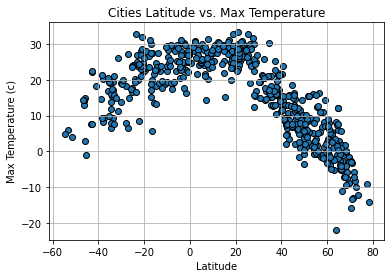

In [92]:
x = City_DF['Lat']
y = City_DF['Max Temp']


plt.scatter(x, y, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')

plt.grid()
plt.title(f'Cities Latitude vs. Max Temperature')

plt.savefig('Latitute_vs_Temperature_Plot.png')

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

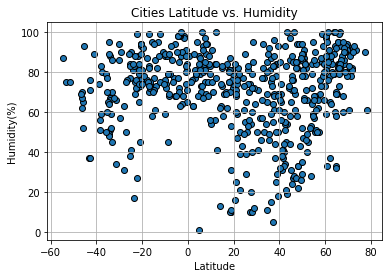

In [93]:
x = City_DF['Lat']
y = City_DF['Humidity']


plt.scatter(x, y, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.grid()
plt.title(f'Cities Latitude vs. Humidity')

plt.savefig('Latitute_vs_Humidity_Plot.png')

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

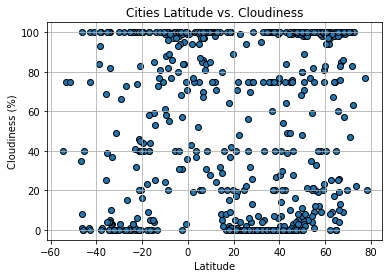

In [94]:
x = City_DF['Lat']
y = City_DF['Cloudiness']


plt.scatter(x, y, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()
plt.title(f'Cities Latitude vs. Cloudiness')

plt.savefig('Latitute_vs_Cloudiness_Plot.png')

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

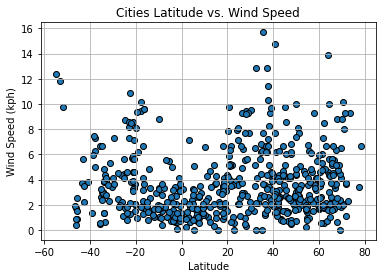

In [95]:
x = City_DF['Lat']
y = City_DF['Wind Speed']


plt.scatter(x, y, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')

plt.grid()
plt.title(f'Cities Latitude vs. Wind Speed')

plt.savefig('Latitute_vs_Wind_Speed_Plot.png')

plt.show

## Linear Regression

In [96]:
Northern_Hemisphere_DF = City_DF.loc[City_DF['Lat'] >= 0]
Southern_Hemisphere_DF = City_DF.loc[City_DF['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.9


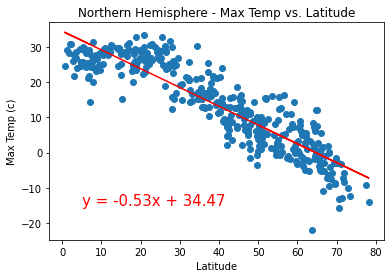

In [97]:
x_value = Northern_Hemisphere_DF['Lat']
y_value = Northern_Hemisphere_DF['Max Temp']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(5,-15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (c)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

plt.savefig('Northern_Hemisphere_Max_Temp_vs_Latitude.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.66


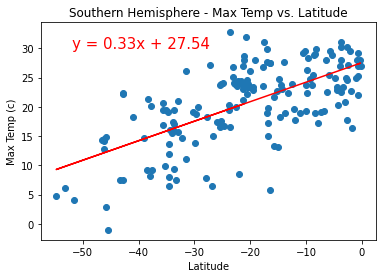

In [98]:
x_value = Southern_Hemisphere_DF['Lat']
y_value = Southern_Hemisphere_DF['Max Temp']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(-52,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (c)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

plt.savefig('Southern_Hemisphere_Max_Temp_vs_Latitude.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.12


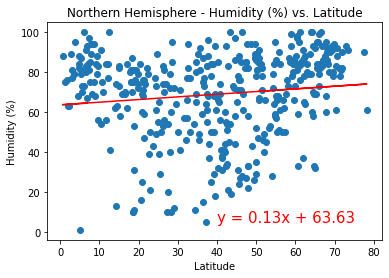

In [99]:
x_value = Northern_Hemisphere_DF['Lat']
y_value = Northern_Hemisphere_DF['Humidity']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

plt.savefig('Northern_Hemisphere_Humidity_vs_Latitude.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.34


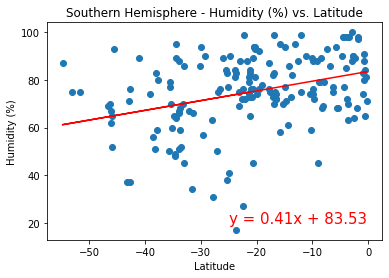

In [100]:
x_value = Southern_Hemisphere_DF['Lat']
y_value = Southern_Hemisphere_DF['Humidity']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(-25,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')

plt.savefig('Southern_Hemisphere_Humidity_vs_Latitude.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11


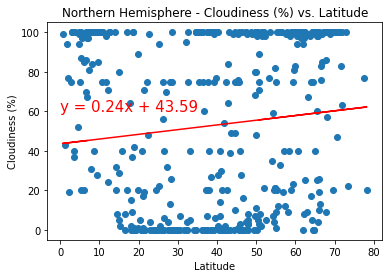

In [111]:
x_value = Northern_Hemisphere_DF['Lat']
y_value = Northern_Hemisphere_DF['Cloudiness']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(0,60),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

plt.savefig('Northern_Hemisphere_Cloudiness_vs_Latitude.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.3


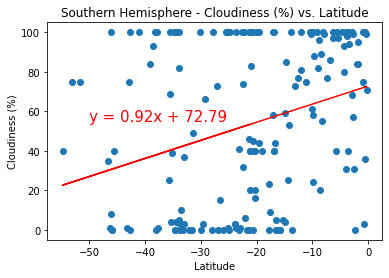

In [110]:
x_value = Southern_Hemisphere_DF['Lat']
y_value = Southern_Hemisphere_DF['Cloudiness']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(-50,55),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

plt.savefig('Southern_Hemisphere_Cloudiness_vs_Latitude.png')

plt.show()

####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The correlation between both factors is 0.17


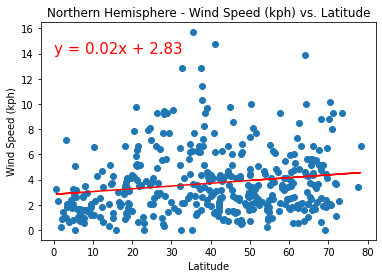

In [108]:
x_value = Northern_Hemisphere_DF['Lat']
y_value = Northern_Hemisphere_DF['Wind Speed']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(0,14),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Northern Hemisphere - Wind Speed (kph) vs. Latitude')

plt.savefig('Northern_Hemisphere_Wind_Speed_vs_Latitude.png')

plt.show()

####  Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The correlation between both factors is -0.29


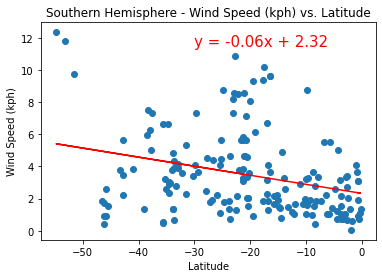

In [107]:
x_value = Southern_Hemisphere_DF['Lat']
y_value = Southern_Hemisphere_DF['Wind Speed']

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(-30,11.5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Southern Hemisphere - Wind Speed (kph) vs. Latitude')

plt.savefig('Southern_Hemisphere_Wind_Speed_vs_Latitude.png')

plt.show()